In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import random
import statistics as st
from matplotlib import pyplot as plt
import seaborn as sns
import scipy as sp
from scipy import stats

In [2]:
novice_token =  pd.read_csv(r'...\Dataset\novice_syn_data.csv')

In [3]:
expert_token =  pd.read_csv(r'...\Dataset\expert_syn_data.csv')

In [5]:
def logML(a):  
    pro = -a*np.log(rank) - np.log(np.sum(1/rank**a))
    

    # Multiply the vector by frequencies
    Lvector =pro * frequency

    # LL is the sum
    L = Lvector.sum()

    # We want to maximize LogLikelihood or minimize (-1)*LogLikelihood
    return(-L)

In [6]:
novice_dt = novice_token.groupby('Author').sum().reset_index()

In [7]:
nov_freq = novice_dt.drop(['Author'],axis=1)

In [8]:
expert_dt = expert_token.groupby('Author').sum().reset_index()

In [9]:
zipf_novice = pd.DataFrame(columns=['alpha','beta','sample_size','rank'])

In [10]:
def zipflaw(dt):
    zipf_dt = pd.DataFrame(columns=['Frequency'])
    nov_freq = dt.drop(['Author'])
    temp2=nov_freq[nov_freq!=0].sort_values(ascending=False).reset_index()
    frequency = temp2[temp2.columns[1]]
    probability = frequency/np.sum(frequency)
    zipf_dt['Frequency'] = frequency
    zipf_dt['Probability'] = probability
    rank=np.array(range(1,len(temp2)+1))
    zipf_dt['rank'] = rank
    initial = (1,1)
    s_best = sp.optimize.minimize(logML_mbt, initial)
    alpha=s_best.x[0]
    beta = s_best.x[1]
    zipf_dt['alpha'] = alpha
    zipf_dt['beta'] = beta
    zipf_dt['zipflaw']=((rank+beta)**(-alpha))/np.sum(1/(rank+beta)**alpha)
    zipf_dt['log_pro'] = np.log(probability.astype(np.float64))
    zipf_dt['log_rank'] = np.log(rank)
    zipf_dt['log_zipflaw'] =  -alpha*np.log(rank+beta) - np.log(np.sum(1/(rank+beta)**alpha))
    return zipf_dt

In [105]:
for i in range (1,600):
    dev=novice_dt.iloc[i]
    nov_freq = dev.drop(['Author'])
    temp2=nov_freq[nov_freq!=0].sort_values(ascending=False).reset_index()
    frequency = temp2[temp2.columns[1]]
    rank=np.array(range(1,len(temp2)+1))
    initial = (1,1)
    s_best = sp.optimize.minimize(logML_mbt, initial)
    zipf_novice=zipf_novice.append({'alpha':s_best.x[0],'beta':s_best.x[1]},ignore_index=True)

In [260]:
zipf_expert = pd.DataFrame(columns=['alpha','beta','sample_size','rank'])

In [106]:
for i in range (1,600):
    dev=expert_dt.iloc[i]
    exp_freq = dev.drop(['Author'])
    temp2=exp_freq[exp_freq!=0].sort_values(ascending=False).reset_index()
    frequency = temp2[temp2.columns[1]]
    rank=np.array(range(1,len(temp2)+1))
    initial = (1,1)
    s_best = sp.optimize.minimize(logML_mbt, initial)
    zipf_expert=zipf_expert.append({'alpha':s_best.x[0],'beta':s_best.x[1]},ignore_index=True)

In [ ]:
#generate synthetic data for confidence interval
for i in range(1,198):
    rank=np.array(range(1,i))
    zipf = pd.DataFrame(columns=['zipflaw'])
    in_alpha=1.00001
    zipf['zipflaw']=((rank)**(-in_alpha))/np.sum(1/(rank)**in_alpha)
    test=zipf*1156
    zipf_dt = pd.DataFrame(columns=['Frequency'])
    #dev = dt_gby.drop(['Author'], axis=1)
    #temp = dev.transpose()
    #exp_freq = temp[0]
    #temp2=exp_freq[exp_freq!=0].sort_values(ascending=False).reset_index()
    df=test.astype(int)
    #frequency = temp2[temp2.columns[1]]
    frequency=df['zipflaw']
    probability = frequency/np.sum(frequency)
    zipf_dt['Frequency'] = frequency
    #rank=np.array(range(1,len(temp2)+1))
    zipf_dt['rank'] = rank
    s_best = sp.optimize.minimize(logML, [1])
    alpha=s_best.x
    zipf_dt['alpha'] = alpha[0]
    zipf_dt['zipflaw']=(rank**(-alpha))/np.sum(1/rank**alpha)
    zipf_dt['zipf_freq']=zipf_dt['zipflaw']*np.sum(zipf_dt['Frequency'])
    initial = (1,0)
    mbt_best = sp.optimize.minimize(logML_mbt, initial)
    alpha_mbt=mbt_best.x[0]
    beta = mbt_best.x[1]
    zipf_dt['alpha_mbt'] = alpha_mbt
    zipf_dt['beta_mbt'] = beta
    zipf_dt['zipf_mbt']=((rank+beta)**(-alpha_mbt))/np.sum(1/(rank+beta)**alpha_mbt)
    zipf_dt['zipf_mbt_freq']=zipf_dt['zipf_mbt']*np.sum(zipf_dt['Frequency'])
    zipf_dt['Probability'] = probability
    zipf_dt['log_pro'] = np.log(probability.astype(np.float64))
    zipf_dt['log_rank'] = np.log(rank)
    zipf_dt['log_zipflaw'] = -alpha*np.log(rank) - np.log(np.sum(1/rank**alpha))
    zipf_dt['log_zipf_mbt'] =  -alpha_mbt*np.log(rank+beta) - np.log(np.sum(1/(rank+beta)**alpha_mbt))

In [3020]:
def token_probability(data):
    token_pro = pd.DataFrame(columns=['token','pro'])
    for col in data:
        pro=np.sum(data[col])/np.sum(data.sum())
        token_pro = token_pro.append({'token':col, 'pro': pro},ignore_index=True)
    return token_pro

In [3021]:
nov_dt = cv_token.drop(['Author'],axis=1)
pro_nov = token_probability(nov_dt)

In [3225]:
dt_freq = pd.DataFrame (pr_zpf,columns=['zipflaw'])   
df=pr_zpf.astype(int)
exp_freq=df
temp2=exp_freq[exp_freq!=0].sort_values(ascending=False).reset_index()
frequency = temp2[temp2.columns[1]]
rank=np.array(range(1,len(temp2)+1))
s_best = sp.optimize.minimize(logML, [1])
alpha=s_best.x

In [3233]:
y_true = np.array(frequency)

In [3227]:
pr_predict=(rank**(-alpha))/np.sum(1/rank**alpha)
y_predicted=pr_predict*np.sum(frequency)

In [3236]:
y_predict = np.array(y_predicted)
RSS = np.sum((y_true - y_predict)**2)
    

In [3237]:
np.sqrt(RSS / (len(y_true) - 2))

0.4936419158384149

In [3274]:
Corpus_1_Zipf = pd.DataFrame(columns=['size','alpha','SE','RSE'])

In [3318]:
test = pd.DataFrame(columns=['size','alpha','SE','RSE'])

In [3285]:
Corpus_9_Zipf = pd.DataFrame(columns=['size','alpha','SE','RSE'])

In [3297]:
Corpus_8_Zipf = pd.DataFrame(columns=['size','alpha','SE','RSE'])

In [3314]:
Corpus_7_Zipf = pd.DataFrame(columns=['size','alpha','SE','RSE'])

In [3319]:
keys=0

In [3327]:
for i in range (0,100):
    keys= keys+10
    pr_zpf=zipf['zipflaw']*keys
    dt_freq = pd.DataFrame (pr_zpf,columns=['zipflaw'])   
    df=pr_zpf.astype(int)
    exp_freq=df
    temp2=exp_freq[exp_freq!=0].sort_values(ascending=False).reset_index()
    frequency = temp2[temp2.columns[1]]
    rank=np.array(range(1,len(temp2)+1))
    s_best = sp.optimize.minimize(logML, [1])
    alpha=s_best.x
    
    
    y_true = np.array(frequency)
    pr_predict=(rank**(-alpha))/np.sum(1/rank**alpha)
    y_predicted=pr_predict*np.sum(frequency)
    y_predict = np.array(y_predicted)
    RSS = np.sum((y_true - y_predict)**2)
    rse = np.sqrt(RSS / (len(y_true) - 2))
    
    SE = ((alpha[0]-aph)/np.sqrt(max(rank)))
    
    test=test.append({'size':keys,'alpha':alpha[0],'SE':SE,'RSE': rse},ignore_index=True)

In [107]:
for i in range (0,150):
    keys= keys+10
    zipf_dt = pd.DataFrame(columns=['alpha','RSE','SE'])
    for j in range(0,100):
        r=random.choices(population=tok_exp_one,  weights=zipf['zipflaw'],k=keys)
        #r=random.sample(list_token,keys)
        expert_token = pd.DataFrame(0, index=np.arange(1), columns=list(tok_exp_one))
        expert_token['Author']='dev1'
        x=0
        for word in r:
            expert_token[word][x]+=1
        dev = expert_token.drop(['Author'], axis=1)
        temp = dev.transpose()
        exp_freq = temp[0]
        temp2=exp_freq[exp_freq!=0].sort_values(ascending=False).reset_index()
        frequency = temp2[temp2.columns[1]]
        probability = frequency/np.sum(frequency)
        rank=np.array(range(1,len(temp2)+1))
        s_best = sp.optimize.minimize(logML, [1])
        alpha=s_best.x
        zipf_dt['alpha'] = alpha[0]
        
        
        y_true = np.array(frequency)
        pr_predict=(rank**(-alpha))/np.sum(1/rank**alpha)
        y_predicted=pr_predict*np.sum(frequency)
        y_predict = np.array(y_predicted)
        RSS = np.sum((y_true - y_predict)**2)
        rse = np.sqrt(RSS / (len(y_true) - 2))
    
        SE = ((alpha[0]-aph)/np.sqrt(max(rank)))
        zipf_dt=zipf_dt.append({'alpha':alpha[0],'SE':SE,'RSE': rse},ignore_index=True)
    
    Corpus_7_Zipf=Corpus_7_Zipf.append({'size':keys,'alpha':np.mean(abs(zipf_dt['alpha'])),'SE':np.mean(abs(zipf_dt['SE'])),
                                        'RSE': np.mean(abs(zipf_dt['RSE']))},ignore_index=True)

In [3349]:
Corpus_7_Zipf.to_csv(r'C:\GH-Dataset\Corpus_7_Zipf.csv', index=None, header=True)

In [3415]:
size_SE_1=list(((abs(Corpus_1_Zipf['SE']))))

In [3278]:
size_RSE_1=list((reversed(abs(Corpus_1_Zipf['RSE']))))
size_alpha_1=list((abs(Corpus_1_Zipf['alpha'])))

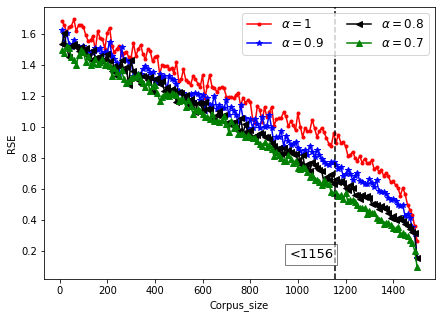

In [3345]:
fig, ax = plt.subplots(figsize=(7,5))
plt.plot(list(Corpus_1_Zipf['size']), size_RSE_1 ,marker='.', color='red')
plt.plot(list(Corpus_1_Zipf['size']), size_RSE_9 ,marker='*', color='blue')
plt.plot(list(Corpus_1_Zipf['size']), size_RSE_8 ,marker='<', color='black')
plt.plot(list(Corpus_1_Zipf['size']), size_RSE_7 ,marker='^', color='green')
ax.axvline(x=1156,linestyle='--',color='black')
ax.text(1149,0.09, "<1156", va='center', ha="right", bbox=dict(facecolor="w",alpha=0.5),fontsize=13,
        transform=ax.get_xaxis_transform())
plt.xlabel("Corpus_size",fontsize=10)
plt.ylabel("RSE",fontsize=10)
plt.legend((r'$\alpha=1$',r'$\alpha=0.9$',r'$\alpha=0.8$',r'$\alpha=0.7$'),loc='upper right',
           ncol=2,
           fontsize=12)
plt.savefig('RSE_corpus.png',dpi=900)

In [3213]:
zipf_dt = pd.DataFrame(columns=['Frequency'])
dev = expert_token.drop(['Author'], axis=1)
temp = dev.transpose()
exp_freq = temp[0]
temp2=exp_freq[exp_freq!=0].sort_values(ascending=False).reset_index()
frequency = temp2[temp2.columns[1]]
probability = frequency/np.sum(frequency)
zipf_dt['Frequency'] = frequency
zipf_dt['Probability'] = probability
rank=np.array(range(1,len(temp2)+1))
zipf_dt['rank'] = rank
s_best = sp.optimize.minimize(logML, [1])
alpha=s_best.x
zipf_dt['alpha'] = alpha[0]
zipf_dt['zipflaw']=(rank**(-alpha))/np.sum(1/rank**alpha)
zipf_dt['log_pro'] = np.log(probability.astype(np.float64))
zipf_dt['log_rank'] = np.log(rank)
zipf_dt['log_zipflaw'] = -alpha*np.log(rank) - np.log(np.sum(1/rank**alpha))

In [711]:
ci=(alpha-1) * 1.96/(len(frequency)**0.5)

In [571]:
#1.96*((alpha-1)/np.sqrt(197))

In [301]:
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), stats.sem(a)
    h = se * stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

In [408]:
mean_confidence_interval(ci_dt)

(1.0170448912886185, 0.8964028200792205, 1.1376869624980166)

In [407]:
ci_dt=np.log(pr_zpf)

In [3369]:
alpha_1_zip = pd.DataFrame(columns=['rank','alpha','alpha_mbt','beta','SE','SE_mbt','RSE','KS','p-value','d_ks','d_ks_mbt'])

In [3380]:
alpha_9_zip = pd.DataFrame(columns=['rank','alpha','alpha_mbt','beta','SE','SE_mbt','RSE','KS','p-value','d_ks','d_ks_mbt'])

In [3409]:
alpha_7_zip = pd.DataFrame(columns=['rank','alpha','alpha_mbt','beta','SE','SE_mbt','RSE','KS','p-value','d_ks','d_ks_mbt'])

In [3395]:
alpha_8_zip = pd.DataFrame(columns=['rank','alpha','alpha_mbt','beta','SE','SE_mbt','RSE','KS','p-value','d_ks','d_ks_mbt'])

In [108]:
for i in range(1,190):
    r_max = 197-i
    extra = pr_zpf[r_max:197]
    zpf = pr_zpf[0:r_max]
    for j in range(0,i):
        #a= 1.0001
        #r= np.array(range(1,r_max+1))
        #wgt=((r)**(-a))/np.sum(1/(r)**a)
        #wgt= np.random.normal(0,1,r_max)
        #keys= random.choices(population=range(0,r_max),  weights=wgt,k=1)
        up= 197-i-1
        keys= random.randint(0,up)
        temp=extra[j]+zpf[keys]
        zpf[keys] = temp
        
    dt_freq = pd.DataFrame (zpf,columns=['frq'])   
    df=dt_freq['frq'].astype(int)
    exp_freq=df
    temp2=exp_freq[exp_freq!=0].sort_values(ascending=False).reset_index()
    frequency = temp2[temp2.columns[1]]
    rank=np.array(range(1,len(temp2)+1))
    s_best = sp.optimize.minimize(logML, [1])
    alpha=s_best.x
    
    y_true = np.array(frequency)
    pr_predict=(rank**(-alpha))/np.sum(1/rank**alpha)
    y_predicted=pr_predict*np.sum(frequency)
    y_predict = np.array(y_predicted)
    RSS = np.sum((y_true - y_predict)**2)
    rse = np.sqrt(RSS / (len(y_true) - 2))

    diff=[]
    cdf_pr = np.sort(zipf['zipflaw'])
    cdf_zipf = np.sort(pr_predict)
    df_pr_null_hyp = [norm.cdf(x) for x in cdf_pr]
    cdf_zipf_null_hyp = [norm.cdf(x) for x in cdf_zipf]
    zip_object = zip(df_pr_null_hyp, cdf_zipf_null_hyp)
    for list1_i, list2_i in zip_object:
        diff.append(abs(list1_i-list2_i))
    d_ks=max(diff)
    
    initial = (1,0)
    mbt_best = sp.optimize.minimize(logML_mbt, initial)
    alpha_mbt=mbt_best.x[0]
    beta = mbt_best.x[1]
    
    y_true = np.array(frequency)
    pr_predict=(rank**(-alpha))/np.sum(1/rank**alpha)
    pr_predict_mbt=((rank+beta)**(-alpha_mbt))/np.sum(1/(rank+beta)**alpha_mbt)
    y_predicted=pr_predict*np.sum(frequency)
    y_predict = np.array(y_predicted)
    RSS = np.sum((y_true - y_predict)**2)
    rse = np.sqrt(RSS / (len(y_true) - 2))
    
    ks,p_value= stats.ks_2samp(frequency, y_predicted , alternative='two-sided')
    
    diff_mbt=[]
    cdf_pr = np.sort(zipf['zipflaw'])
    cdf_zipf = np.sort(pr_predict_mbt)
    df_pr_null_hyp = [norm.cdf(x) for x in cdf_pr]
    cdf_zipf_null_hyp = [norm.cdf(x) for x in cdf_zipf]
    zip_object = zip(df_pr_null_hyp, cdf_zipf_null_hyp)
    for list1_i, list2_i in zip_object:
        diff_mbt.append(abs(list1_i-list2_i))
    d_ks_mbt=max(diff_mbt)
    
    
    SE = ((alpha[0]-aph)/np.sqrt(max(rank)))
    SE_mbt = ((alpha_mbt-aph)/np.sqrt(max(rank)))
    alpha_7_zip=alpha_7_zip.append({'rank':max(rank),'alpha':alpha[0],'alpha_mbt':alpha_mbt,
                        'beta':beta,'SE':SE,'SE_mbt':SE_mbt, 'RSE': rse, 'KS':ks,'p-value':p_value,
                                   'd_ks':d_ks,'d_ks_mbt':d_ks_mbt},ignore_index=True)

In [676]:
alpha_1_zip.to_csv(r'C:\GH-Dataset\alpha_1_zip.csv', index=None, header=True)

In [674]:
alpha_9_zip.to_csv(r'C:\GH-Dataset\alpha_9_zip.csv', index=None, header=True)

In [675]:
alpha_7_zip.to_csv(r'C:\GH-Dataset\alpha_7_zip.csv', index=None, header=True)

In [690]:
alpha_8_zip.to_csv(r'C:\GH-Dataset\alpha_8_zip.csv', index=None, header=True)

In [3382]:
revers_RSE_1=list(reversed((abs(alpha_1_zip['RSE']))))
revers_alpha_1=list(reversed(abs(alpha_1_zip['alpha'])))

In [109]:
fig, ax = plt.subplots(1,4,figsize=(12,7))
#plt.suptitle("Dev_14:zipflaw", fontsize=12)
plt.subplot(2, 2, 1)
#fig = plt.figure()
ax = fig.add_subplot(221)
ax.plot(np.array(range(8,197)), list(revers_RSE_1),  marker='.', color='red',markersize=5)
#ax.axhline(y=1,linestyle='--',color='black')
ax.axvline(x=54,linestyle='--',color='black')
ax.text(58,0.9, ">54", va='center', ha="left", bbox=dict(facecolor="w",alpha=0.5),
        transform=ax.get_xaxis_transform())
#plt.ylim(0.2,1.2)
plt.xlabel("rank",fontsize=10)
plt.ylabel("RSE",fontsize=10)
plt.title(r'$\alpha$=1', fontsize=10)

#------------second chart

plt.subplot(2, 2, 2)
#fig = plt.figure()
ax = fig.add_subplot(222)
ax.plot(np.array(range(8,197)), list(revers_RSE_9),  marker='.', color='red',markersize=5)
#ax.axhline(y=1,linestyle='--',color='black')
ax.axvline(x=66,linestyle='--',color='black')
ax.text(68,0.9, ">66", va='center', ha="left", bbox=dict(facecolor="w",alpha=0.5),
        transform=ax.get_xaxis_transform())
#plt.ylim(0.2,1.2)
plt.xlabel("rank",fontsize=10)
#plt.ylabel(r'$\alpha$',fontsize=10)
plt.title(r'$\alpha=0.9$', fontsize=10)

#----------third chart

plt.subplot(2, 2, 3)
#fig = plt.figure()
ax = fig.add_subplot(223)
ax.plot(np.array(range(8,197)), list(revers_RSE_8),  marker='.', color='red',markersize=5)
#ax.axhline(y=1,linestyle='--',color='black')
ax.axvline(x=67,linestyle='--',color='black')
ax.text(70,0.9, ">67", va='center', ha="left", bbox=dict(facecolor="w",alpha=0.5),
        transform=ax.get_xaxis_transform())
#plt.ylim(0.2,1.2)
plt.xlabel("rank",fontsize=10)
#plt.ylabel(r'$\alpha$',fontsize=10)
plt.title(r'$\alpha=0.8$', fontsize=10)

#------forth chart
plt.subplot(2, 2, 4)
#fig = plt.figure()
ax = fig.add_subplot(224)
ax.plot(np.array(range(8,197)), list(revers_RSE_7),  marker='.', color='red',markersize=5)
#ax.axhline(y=1,linestyle='--',color='black')
ax.axvline(x=65,linestyle='--',color='black')
ax.text(67,0.9, ">65", va='center', ha="left", bbox=dict(facecolor="w",alpha=0.5),
        transform=ax.get_xaxis_transform())
#plt.ylim(0.2,1.2)
plt.xlabel("rank",fontsize=10)
#plt.ylabel(r'$\alpha$',fontsize=10)
plt.title(r'$\alpha=0.7$', fontsize=10)
plt.show()

In [110]:
fig, ax = plt.subplots(1,4,figsize=(25,3))
#plt.suptitle("Dev_14:zipflaw", fontsize=12)
plt.subplot(1, 4, 1)
#fig = plt.figure()
ax = fig.add_subplot(141)
ax.plot(np.array(range(8,197)), list(revers_RSE_1),  marker='.', color='red',markersize=5)
#ax.axhline(y=1,linestyle='--',color='black')
ax.axvline(x=54,linestyle='--',color='black')
ax.text(58,0.9, ">54", va='center', ha="left", bbox=dict(facecolor="w",alpha=0.5),
        transform=ax.get_xaxis_transform())
#plt.ylim(0.2,1.2)
plt.xlabel("rank",fontsize=10)
plt.ylabel("RSE",fontsize=10)
plt.title(r'$\alpha$=1', fontsize=10)

#------------second chart

plt.subplot(1, 4, 2)
#fig = plt.figure()
ax = fig.add_subplot(142)
ax.plot(np.array(range(8,197)), list(revers_RSE_9),  marker='.', color='red',markersize=5)
#ax.axhline(y=1,linestyle='--',color='black')
ax.axvline(x=66,linestyle='--',color='black')
ax.text(68,0.9, ">66", va='center', ha="left", bbox=dict(facecolor="w",alpha=0.5),
        transform=ax.get_xaxis_transform())
#plt.ylim(0.2,1.2)
plt.xlabel("rank",fontsize=10)
#plt.ylabel(r'$\alpha$',fontsize=10)
plt.title(r'$\alpha=0.9$', fontsize=10)

#----------third chart

plt.subplot(1, 4, 3)
#fig = plt.figure()
ax = fig.add_subplot(143)
ax.plot(np.array(range(8,197)), list(revers_RSE_8),  marker='.', color='red',markersize=5)
#ax.axhline(y=1,linestyle='--',color='black')
ax.axvline(x=67,linestyle='--',color='black')
ax.text(70,0.9, ">67", va='center', ha="left", bbox=dict(facecolor="w",alpha=0.5),
        transform=ax.get_xaxis_transform())
#plt.ylim(0.2,1.2)
plt.xlabel("rank",fontsize=10)
#plt.ylabel(r'$\alpha$',fontsize=10)
plt.title(r'$\alpha=0.8$', fontsize=10)

#------forth chart
plt.subplot(1, 4, 4)
#fig = plt.figure()
ax = fig.add_subplot(144)
ax.plot(np.array(range(8,197)), list(revers_RSE_1),  marker='.', color='red',markersize=5)
#ax.axhline(y=1,linestyle='--',color='black')
ax.axvline(x=65,linestyle='--',color='black')
ax.text(67,0.9, ">65", va='center', ha="left", bbox=dict(facecolor="w",alpha=0.5),
        transform=ax.get_xaxis_transform())
#plt.ylim(0.2,1.2)
plt.xlabel("rank",fontsize=10)
#plt.ylabel(r'$\alpha$',fontsize=10)
plt.title(r'$\alpha=0.7$', fontsize=10)
plt.show()

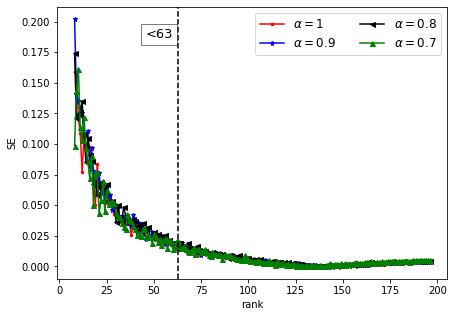

In [3413]:
fig, ax = plt.subplots(figsize=(7,5))
plt.plot(np.array(range(8,197)), list(revers_SE_1) ,marker='.', color='red',markersize=5)
plt.plot(np.array(range(8,197)), list(revers_SE_9) ,marker='*', color='blue',markersize=5)
plt.plot(np.array(range(8,197)), list(revers_SE_8) ,marker='<', color='black',markersize=5)
plt.plot(np.array(range(8,197)), list(revers_SE_7) ,marker='^', color='green',markersize=5)
ax.axvline(x=63,linestyle='--',color='black')
ax.text(60,0.9, "<63", va='center', ha="right", bbox=dict(facecolor="w",alpha=0.5),fontsize=13,
        transform=ax.get_xaxis_transform())
plt.xlabel("rank",fontsize=10)
plt.ylabel("SE",fontsize=10)
plt.legend((r'$\alpha=1$',r'$\alpha=0.9$',r'$\alpha=0.8$',r'$\alpha=0.7$'),loc='upper right',
           ncol=2,
           fontsize=12)
#plt.savefig('RSE_q.png',dpi=900)

In [669]:
d_ks=max(abs(zipf_dt['cdf_pro']-zipf_dt['cdf_zipf']))